In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath

from Functions import *

# b Scan for GBWA

In [2]:
b=0.01
omega0 = np.sqrt(lambda_355 * b / (2* np.pi))
zR = b / 2     # [m] Rayleigh Range



pulse_params = {'b' : b,            # [m] confocal parameter
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9,
            'PXe':1000}     # [s] single pulse length

harm_params = {'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}

zstart = -0.3
zstop = 0.3
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 1000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params_WA = {'func': curly_GBWA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_WA = {**pulse_params, **harm_params, **sol_params_WA}


In [3]:
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

In [4]:
bsamples = 100
brange = (0.1, 3) # confocal perameter [m]
bs = np.linspace(brange[0], brange[1], bsamples)
bscan = xr.DataArray(bs,
                     dims = 'b',
                     attrs = {'units': 'm',
                              'long_name': "Confocal parameter"})
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

B_scan = scan_builder(single_func, params_WA, [bscan])

In [5]:
scanned_WA = B_scan(params=params_WA)

0.1
0.1292929292929293
0.15858585858585858
0.18787878787878787
0.21717171717171718
0.24646464646464647
0.27575757575757576
0.305050505050505
0.33434343434343433
0.36363636363636365
0.3929292929292929
0.42222222222222217
0.45151515151515154
0.4808080808080808
0.51010101010101
0.5393939393939393
0.5686868686868687
0.597979797979798
0.6272727272727272
0.6565656565656565
0.6858585858585858
0.7151515151515151
0.7444444444444444
0.7737373737373736
0.803030303030303
0.8323232323232322
0.8616161616161615
0.8909090909090909
0.9202020202020201
0.9494949494949494
0.9787878787878787
1.0080808080808081
1.0373737373737373
1.0666666666666667
1.095959595959596
1.1252525252525252
1.1545454545454545
1.183838383838384
1.213131313131313
1.2424242424242424
1.2717171717171718
1.301010101010101
1.3303030303030303
1.3595959595959597
1.3888888888888888
1.4181818181818182
1.4474747474747474
1.4767676767676767
1.506060606060606
1.5353535353535352
1.5646464646464646
1.593939393939394
1.6232323232323231
1.65252525

In [6]:
print(np.where(scanned_WA.data[:,0] == max(scanned_WA.data[:,0]))[0][0])

17


In [7]:
print(scanned_WA.b.data[17])

0.597979797979798


Text(0.5, 1.0, 'Optimal b = 0.4 [m]')

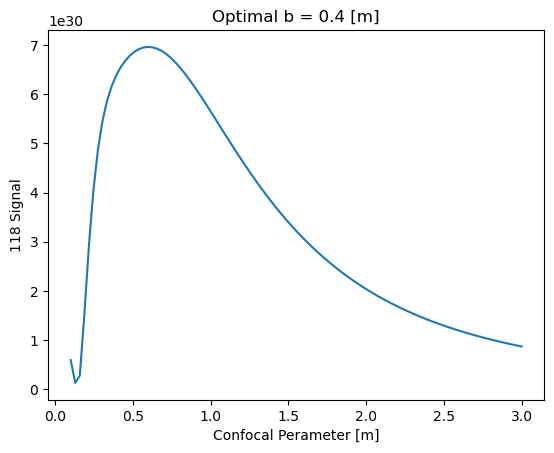

In [8]:
plt.plot(scanned_WA.b.data,scanned_WA.data[:,0])
plt.xlabel('Confocal Perameter [m]')
plt.ylabel('118 Signal')
plt.title('Optimal b = 0.4 [m]')

## Focal Length

In [9]:
omega0 = 0.5e-2 # [m] Beam radius at the focus
b= 2*np.pi*omega0**2/lambda_355 # NOTE: this is initial b from output of laser
zR = b/2
params_355 = { 'lambda': lambda_355}

q_initial = complex(0,zR)
print('INITIAL:')
q_to_params(q_initial,params_355)

q_final = thin_lens(q_initial,50e-2) 

print("FINAL:")
q_to_params(q_final,params_355)

INITIAL:
positon relative to focus:  0.0 [m]
beam spot size:  0.005 [m]
FINAL:
positon relative to focus:  -0.49999744621261005 [m]
beam spot size:  0.005 [m]


In [10]:
b_to_f(0.5e-2, 2*np.pi*omega0**2/lambda_355,0.5,params_355)

7.432857503609319

[ 3.3255747   3.78128778  4.1876484   4.55787592  4.90016721  5.22002076
  5.52133744  5.80700354  6.07922576  6.33973615  6.58992383  6.83092315
  7.06367463  7.28896846  7.50747607  7.71977373  7.92636046  8.12767174
  8.32409036  8.51595486  8.70356644  8.88719446  9.06708095  9.24344438
  9.41648269  9.58637597  9.75328857  9.917371   10.07876149 10.23758737
 10.39396621 10.54800685 10.69981029 10.84947045 10.99707483 11.14270514
 11.2864378  11.42834443 11.56849222 11.70694434 11.84376029 11.97899611
 12.11270475 12.24493623 12.37573793 12.5051547  12.63322911 12.7600016
 12.8855106  13.00979268 13.13288267 13.25481381 13.37561777 13.49532485
 13.61396398 13.73156285 13.84814796 13.96374472 14.07837747 14.19206959
 14.3048435  14.41672075 14.52772208 14.63786741 14.74717592 14.8556661
 14.96335575 15.07026204 15.17640152 15.28179018 15.38644346 15.49037625
 15.59360298 15.69613759 15.79799354 15.89918389 15.99972128 16.09961794
 16.19888573 16.29753614 16.39558033 16.49302911 16.5

Text(0, 0.5, '118 signal')

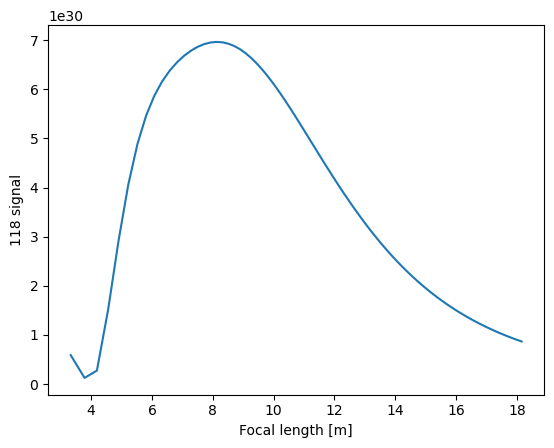

In [11]:
f_arr = np.zeros(len(scanned_WA.b.data))


index =0
for b in scanned_WA.b.data:
    f_arr[index] = b_to_f(0.5e-2,2*np.pi*omega0**2/lambda_355,b,params_355)
    index+=1

    
    
print(f_arr)

plt.plot(f_arr,scanned_WA.data[:,0])
plt.xlabel('Focal length [m]')
plt.ylabel('118 signal')

In [12]:
np.sqrt(np.pi*(0.00226)**2/(2*np.pi))

0.0015980613254815972

# B Scan For GBNA

In [16]:
b=1
omega0 = np.sqrt(lambda_355 * b / (2* np.pi))
zR = b / 2     # [m] Rayleigh Range



pulse_params = {'b' : b,            # [m] confocal parameter
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9,
            'PXe':1000}     # [s] single pulse length

harm_params = {'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}

zstart = -0.3
zstop = 0.3
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 1000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params_NA = {'func': curly_GBNA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_NA = {**pulse_params, **harm_params, **sol_params_NA}

bsamples = 100
brange = (0.01, 3) # confocal perameter [m]
bs = np.linspace(brange[0], brange[1], bsamples)
bscan = xr.DataArray(bs,
                     dims = 'b',
                     attrs = {'units': 'm',
                              'long_name': "Confocal parameter"})
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

B_scan_NA = scan_builder(single_func, params_NA, [bscan])

In [17]:
scanned = B_scan_NA(params=params_NA)

0.01
0.040202020202020204
0.07040404040404041
0.10060606060606062
0.13080808080808082
0.16101010101010105
0.19121212121212125
0.22141414141414145
0.2516161616161616
0.28181818181818186
0.3120202020202021
0.34222222222222226
0.3724242424242425
0.40262626262626267
0.4328282828282829
0.46303030303030307
0.4932323232323233
0.5234343434343435
0.5536363636363637
0.5838383838383839
0.6140404040404042
0.6442424242424243
0.6744444444444445
0.7046464646464647
0.734848484848485
0.7650505050505052
0.7952525252525253
0.8254545454545456
0.8556565656565658
0.885858585858586
0.9160606060606061
0.9462626262626264
0.9764646464646466
1.0066666666666668
1.036868686868687
1.0670707070707073
1.0972727272727274
1.1274747474747475
1.1576767676767679
1.187878787878788
1.2180808080808083
1.2482828282828284
1.2784848484848486
1.308686868686869
1.338888888888889
1.3690909090909094
1.3992929292929295
1.4294949494949496
1.45969696969697
1.48989898989899
1.5201010101010104
1.5503030303030305
1.5805050505050506
1.610

Text(0.5, 1.0, 'Optimal b = 0.136 [m]')

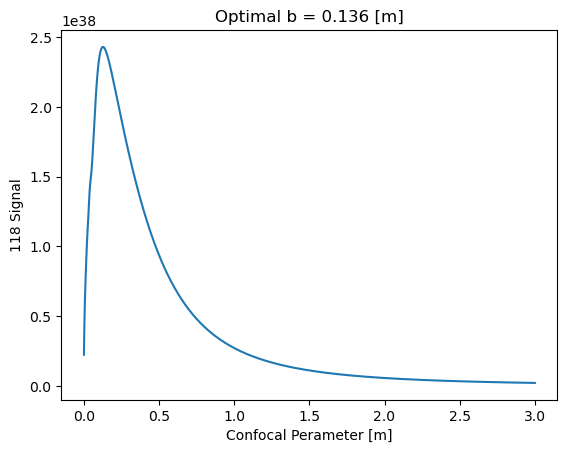

In [17]:
plt.plot(scanned.b.data,scanned.data[:,0])
plt.xlabel('Confocal Perameter [m]')
plt.ylabel('118 Signal')
plt.title('Optimal b = 0.136 [m]')

In [12]:
print(np.where(scanned.data[:,0] == max(scanned.data[:,0]))[0][0])

422


In [15]:
print(scanned_WA.b.data[422])

0.13619061906190622
